In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import ipywidgets as widgets

## Q1. Translate the lena translate.png image by (tx = 3.75, ty = 4.3) pixels

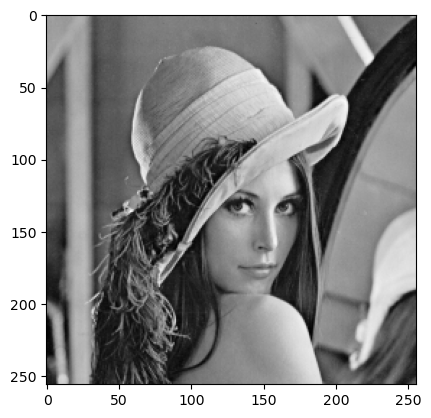

In [2]:
img_1 = plt.imread("lena_translate.png")
plt.imshow(img_1,cmap="gray");

In [3]:
img_1.shape

(256, 256)

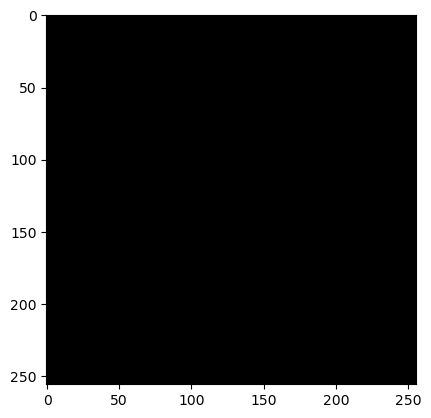

In [4]:
translated_img = np.zeros([img_1.shape[0],img_1.shape[1]])
plt.imshow(translated_img,cmap="gray");

### For In-plane Translation by tx and ty
**From Source to Target**<br><br>
$\begin{bmatrix} x_t \\ y_t\end{bmatrix}$ = $\begin{bmatrix} x_s \\ y_s \end{bmatrix}$+$\begin{bmatrix} t_x \\ t_y\end{bmatrix}$ <br><br>
$x_t = x_s + t_x$ <br>
$y_t = y_s + t_y$ <br>
****
**From Target to Source**<br><br>
$\begin{bmatrix} x_s \\ y_s\end{bmatrix}$ = $\begin{bmatrix} x_t \\ y_t \end{bmatrix}$-$\begin{bmatrix} t_x \\ t_y\end{bmatrix}$ <br><br>
$x_s = x_t - t_x$ <br>
$y_s = y_t - t_y$ <br>
****
### Bilinear Interpolation
If $x_p$ divides two points $x_{left}$ and $x_{right}$ in the ratio of a:(1-a), then:<br>
$x_p = (1-a)*x_{left} + a*x_{right} $<br>
Similarly If $y_p$ divides two points $y_{top}$ and $y_{bottom}$ in the ratio of b:(1-b), then:<br>
$y_p = (1-b)*y_{top} + b*y_{bottom} $<br>
Generalizing the above equations in 2-D:<br>
$\begin{bmatrix}x_p \\ y_p\end{bmatrix} = (1-a)(1-b)\begin{bmatrix}x_{left} \\ y_{top}\end{bmatrix}+a(1-b)\begin{bmatrix} x_{right}\\ y_{top}\end{bmatrix}+(1-a)b\begin{bmatrix} x_{left}\\ y_{bottom}\end{bmatrix}+ab\begin{bmatrix}x_{right} \\ y_{bottom}\end{bmatrix}$

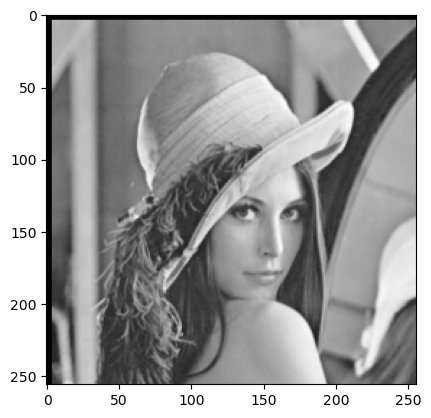

In [5]:
tx = 3.75
ty = 4.3
for row in range(img_1.shape[0]):
    for col in range(img_1.shape[1]):
        if (row-tx>0 and row-ty<img_1.shape[0] and col-tx>0 and col-ty<img_1.shape[1]):
            a = col - tx - int(col - tx) 
            b = row - ty - int(row - ty)
            x_left = int(col - tx)
            x_right = int(col - tx) +1
            y_top = int(row -ty)
            y_bottom = int(row-ty) + 1
            translated_img[row][col] = (1-a)*(1-b)*img_1[y_top][x_left] 
            if(x_right<img_1.shape[1]):
                translated_img[row][col] = translated_img[row][col] + a*(1-b)*img_1[y_top][x_right]
            if(y_bottom<img_1.shape[0]):
                translated_img[row][col] = translated_img[row][col] + (1-a)*b*img_1[y_bottom][x_left] 
            if(x_right<img_1.shape[1] and y_bottom<img_1.shape[0]):
                translated_img[row][col] = translated_img[row][col] + a*b*img_1[y_bottom][x_right]
plt.imshow(translated_img,cmap="gray");

## Q2. Rotate the pisa rotate.png image about the image centre

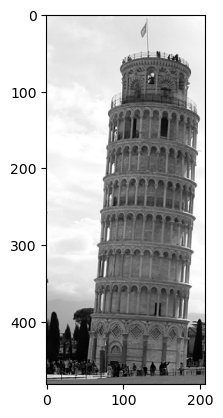

In [6]:
img_2 = plt.imread("pisa_rotate.png")
plt.imshow(img_2,cmap="gray");

### For In-plane Rotation by $\theta$
**From Source to Target**<br><br>
$\begin{bmatrix} x_t \\ y_t\end{bmatrix}$ = $\begin{bmatrix} Cos[\theta] & Sin[\theta] \\ -Sin[\theta] & Cos[\theta]\end{bmatrix}$$\begin{bmatrix} x_s \\ y_s\end{bmatrix}$ <br><br>
$x_t = x_s*Cos[\theta]+y_s*Sin[\theta]$ <br>
$y_t = -x_s*Sin[\theta]+y_s*Cos[\theta]$ <br>
****
**From Target to Source**<br><br>
$\begin{bmatrix} x_s \\ y_s\end{bmatrix}$ = $\begin{bmatrix} Cos[\theta] & -Sin[\theta] \\ Sin[\theta] & Cos[\theta]\end{bmatrix}$$\begin{bmatrix} x_t \\ y_t\end{bmatrix}$<br><br>
$x_s = x_t*Cos[\theta]-y_t*Sin[\theta]$ <br>
$y_s = x_t*Sin[\theta]+y_t*Cos[\theta]$ <br>

In [7]:
#Center 
def rotate_image_about_center(T):
    theta = (2*np.pi*T)/360
    Rotated_Image = np.zeros([img_2.shape[0],img_2.shape[1]])
    Cy,Cx = img_2.shape[0]/2,img_2.shape[1]/2
    for row in range(img_2.shape[0]):
        yt = row -Cy
        for col in range(img_2.shape[1]):
            xt = col - Cx
            xs = xt*np.cos(theta)-yt*np.sin(theta)
            ys = xt*np.sin(theta)+yt*np.cos(theta)
            if (xs+Cx>=0 and xs+Cx<img_2.shape[1] and ys+Cy>=0 and ys+Cy<img_2.shape[0]):
                
                a = xs+Cx - int(xs+Cx) 
                b = ys+Cy - int(ys+Cy)
                x_left = int(xs+Cx)
                x_right = int(xs+Cx) +1
                y_top = int(ys+Cy)
                y_bottom = int(ys+Cy) + 1
                Rotated_Image[row][col] = (1-a)*(1-b)*img_2[y_top][x_left]
                if (x_right<img_2.shape[1]):
                    Rotated_Image[row][col] = Rotated_Image[row][col] + a*(1-b)*img_2[y_top][x_right]
                if (y_bottom<img_2.shape[0]):
                    Rotated_Image[row][col] = Rotated_Image[row][col] + (1-a)*b*img_2[y_bottom][x_left]
                if (x_right<img_2.shape[1] and y_bottom<img_2.shape[0]):
                    Rotated_Image[row][col] = Rotated_Image[row][col] + a*b*img_2[y_bottom][x_right]
    plt.imshow(Rotated_Image,cmap="gray")

Widgets = widgets.interact(
    rotate_image_about_center,
    T=widgets.IntSlider(min=0, max=20, step=1, value=4, description = '$theta(deg)$'),
)

interactive(children=(IntSlider(value=4, description='$theta(deg)$', max=20), Output()), _dom_classes=('widget…

## Q3. Scale the cells scale.png image by 0.8 and 1.3 factors.

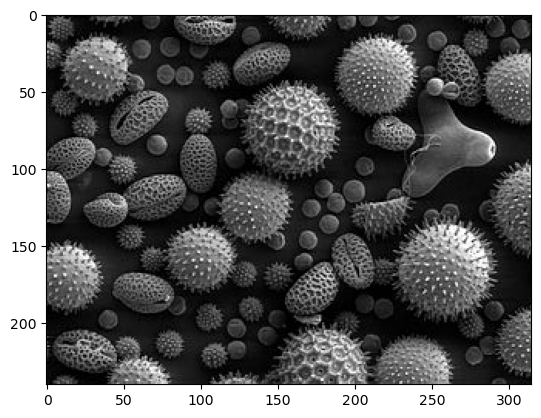

In [8]:
from PIL import Image
img_3 = Image.open("cells_scale.png")
img_3 = np.array(img_3.getdata()).reshape([img_3.size[1],img_3.size[0]])
plt.imshow(img_3,cmap="gray");

In [9]:
img_3.shape

(240, 315)

### For Scaling by $S_x$ and $S_y$ along x-axis and y-axis  respectively
**From Source to Target**<br><br>
$\begin{bmatrix} x_t \\ y_t\end{bmatrix}$ = $\begin{bmatrix} S_x & 0 \\ 0 & S_y\end{bmatrix}$$\begin{bmatrix} x_s \\ y_s\end{bmatrix}$ <br><br>
$x_t = S_x*x_s$ <br>
$y_t = S_y*y_s$ <br>
****
**From Target to Source**<br><br>
$\begin{bmatrix} x_s \\ y_s\end{bmatrix}$ = $\begin{bmatrix} 1/S_x & 0 \\ 0 & 1/S_y\end{bmatrix}$$\begin{bmatrix} x_t \\ y_t\end{bmatrix}$<br><br>
$x_s = x_t/S_x$ <br>
$y_s = y_t/S_y$ <br>

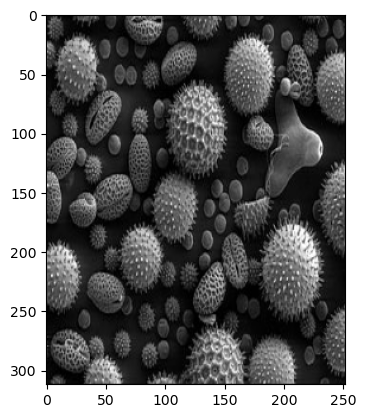

In [10]:
Sx = 0.8
Sy = 1.3
Scaled_Image = np.zeros([int(Sy*img_3.shape[0]),int(Sx*img_3.shape[1])])
for row in range(Scaled_Image.shape[0]):
        ys = row/Sy
        for col in range(Scaled_Image.shape[1]):
            xs = col/Sx
            
            if (xs>=0 and xs<img_3.shape[1] and ys>=0 and ys<img_3.shape[0]):
                a = xs - int(xs) 
                b = ys - int(ys)
                
                x_left = int(xs)
                x_right = int(xs) +1
                y_top = int(ys)
                y_bottom = int(ys) + 1
                Scaled_Image[row][col] = (1-a)*(1-b)*img_3[y_top][x_left]
                if (x_right<img_3.shape[1]):
                    Scaled_Image[row][col] = Scaled_Image[row][col] + a*(1-b)*img_3[y_top][x_right]
                if (y_bottom<img_3.shape[0]):
                    Scaled_Image[row][col] = Scaled_Image[row][col] + (1-a)*b*img_3[y_bottom][x_left]
                if (x_right<img_3.shape[1] and y_bottom<img_3.shape[0]):
                    Scaled_Image[row][col] = Scaled_Image[row][col] + a*b*img_3[y_bottom][x_right]
plt.imshow(Scaled_Image,cmap="gray");

In [11]:
Scaled_Image.shape

(312, 252)

## Uniform Scaling with Scaling factor = 0.8

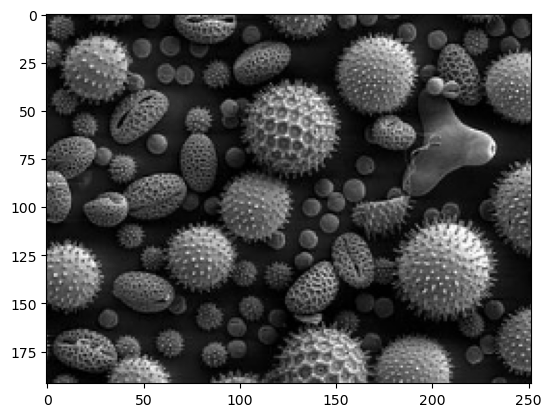

In [12]:
Sx = 0.8
Sy = 0.8
Scaled_Image = np.zeros([int(Sy*img_3.shape[0]),int(Sx*img_3.shape[1])])
for row in range(Scaled_Image.shape[0]):
        ys = row/Sy
        for col in range(Scaled_Image.shape[1]):
            xs = col/Sx
            
            if (xs>=0 and xs<img_3.shape[1] and ys>=0 and ys<img_3.shape[0]):
                a = xs - int(xs) 
                b = ys - int(ys)
                
                x_left = int(xs)
                x_right = int(xs) +1
                y_top = int(ys)
                y_bottom = int(ys) + 1
                Scaled_Image[row][col] = (1-a)*(1-b)*img_3[y_top][x_left]
                if (x_right<img_3.shape[1]):
                    Scaled_Image[row][col] = Scaled_Image[row][col] + a*(1-b)*img_3[y_top][x_right]
                if (y_bottom<img_3.shape[0]):
                    Scaled_Image[row][col] = Scaled_Image[row][col] + (1-a)*b*img_3[y_bottom][x_left]
                if (x_right<img_3.shape[1] and y_bottom<img_3.shape[0]):
                    Scaled_Image[row][col] = Scaled_Image[row][col] + a*b*img_3[y_bottom][x_right]
plt.imshow(Scaled_Image,cmap="gray");

## Uniform Scaling with Scaling factor = 1.3

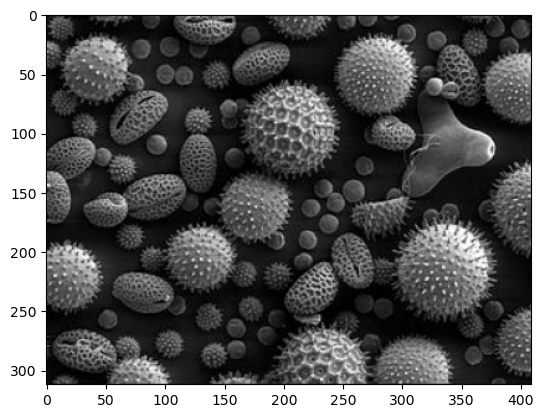

In [13]:
Sx = 1.3
Sy = 1.3
Scaled_Image = np.zeros([int(Sy*img_3.shape[0]),int(Sx*img_3.shape[1])])
for row in range(Scaled_Image.shape[0]):
        ys = row/Sy
        for col in range(Scaled_Image.shape[1]):
            xs = col/Sx
            
            if (xs>=0 and xs<img_3.shape[1] and ys>=0 and ys<img_3.shape[0]):
                a = xs - int(xs) 
                b = ys - int(ys)
                
                x_left = int(xs)
                x_right = int(xs) +1
                y_top = int(ys)
                y_bottom = int(ys) + 1
                Scaled_Image[row][col] = (1-a)*(1-b)*img_3[y_top][x_left]
                if (x_right<img_3.shape[1]):
                    Scaled_Image[row][col] = Scaled_Image[row][col] + a*(1-b)*img_3[y_top][x_right]
                if (y_bottom<img_3.shape[0]):
                    Scaled_Image[row][col] = Scaled_Image[row][col] + (1-a)*b*img_3[y_bottom][x_left]
                if (x_right<img_3.shape[1] and y_bottom<img_3.shape[0]):
                    Scaled_Image[row][col] = Scaled_Image[row][col] + a*b*img_3[y_bottom][x_right]
plt.imshow(Scaled_Image,cmap="gray");